In [1]:
suppressMessages(library(ggplot2))
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))

In [2]:
set.seed(42)
addArchRThreads(threads = 64)

Setting default number of Parallel threads to 64.



In [3]:
proj <- loadArchRProject("./ArchRProject", showLogo = FALSE)

Successfully loaded ArchRProject!



# 添加手动注释结果
1. 添加Clusters手动注释结果
2. plot
    - UMAP

labels:
 - 上皮细胞 `epithelial cells` - Epithelial
 - 内皮细胞 `endothelial cells` - Endothelial
 - 免疫细胞 `immune cells`
    - T细胞 `T cells` - T_cell
    - B细胞 `B cells` - B_cell
    - 髓系细胞 `myeloid cells` - Myeloid
    - 肥大细胞 `mast cells` - Mast
    - 浆母细胞 `plasmablasts` - Plasma
 - 间充质细胞 `mesenchymal cells`
    - 成纤维细胞 `fibroblasts` - Fibroblast
    - 血管周围样细胞 `perivascular-like cells` - PeriVascular

In [21]:
cell_annotations <- list(
    "Myeloid" = paste0("C", c(14:16)),
    "T_cell" = paste0("C", 12),
    "B_cell" = paste0("C", 10),
    "Plasma" = paste0("C", 11),
    "Fibroblast" = paste0("C", c(21:22)),
    "PeriVascular" = paste0("C", 20),
    "Endothelial" = paste0("C", c(17:19)),
    "Mast" = paste0("C", 13),
    "Epithelial" = paste0("C", c(1:9,23:25))
)

In [22]:
## 根据cell——annotations和proj$Clusters创建proj$cellType列
# 对于cell_annotations中的每一个元素（细胞类型）返回proj$Clusters中对应的索引
idz <- lapply(cell_annotations, function(x) which(proj$Clusters %in% x))
# 创建proj$cellType列，长度为proj@cellColData的行数，初始化为NA
proj$majorType <- rep(NA, nrow(proj@cellColData))
# 遍历idz中的每一个元素，将proj$cellType中对应的索引赋值为元素的名称
for(i in names(idz)){proj$majorType[idz[[i]]] <- i}

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-c4e2b47156507-Date-2025-08-19_Time-05-31-08.576975.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-c4e2b47156507-Date-2025-08-19_Time-05-31-08.576975.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-c4e2b2d603520-Date-2025-08-19_Time-05-31-16.515028.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-c4e2b2d603520-Date-2025-08-19_Time-05-31-16.515028.log



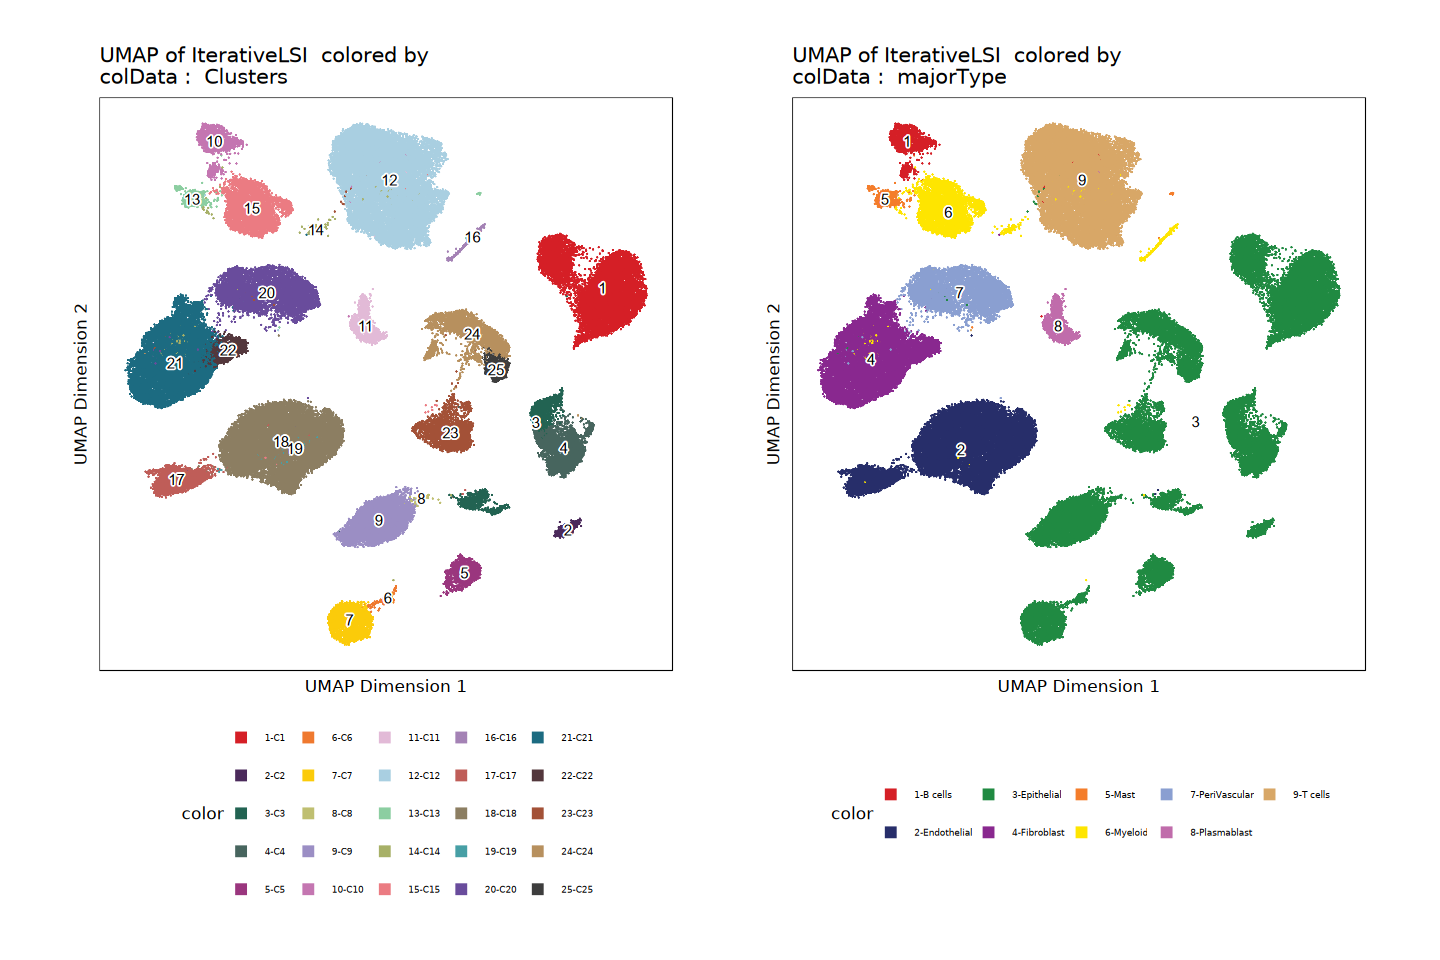

In [4]:
options(repr.plot.height = 8, repr.plot.width = 12)
p1 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "Clusters", 
    embedding = "UMAP"
    )
p2 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "majorType", 
    embedding = "UMAP"
    )
ggAlignPlots(p1, p2, type = "h")

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-82b7d73737d1b-Date-2025-09-05_Time-14-54-21.353043.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-82b7d73737d1b-Date-2025-09-05_Time-14-54-21.353043.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-82b7d15d40277-Date-2025-09-05_Time-14-54-22.298104.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-82b7d15d40277-Date-2025-09-05_Time-14-54-22.298104.log



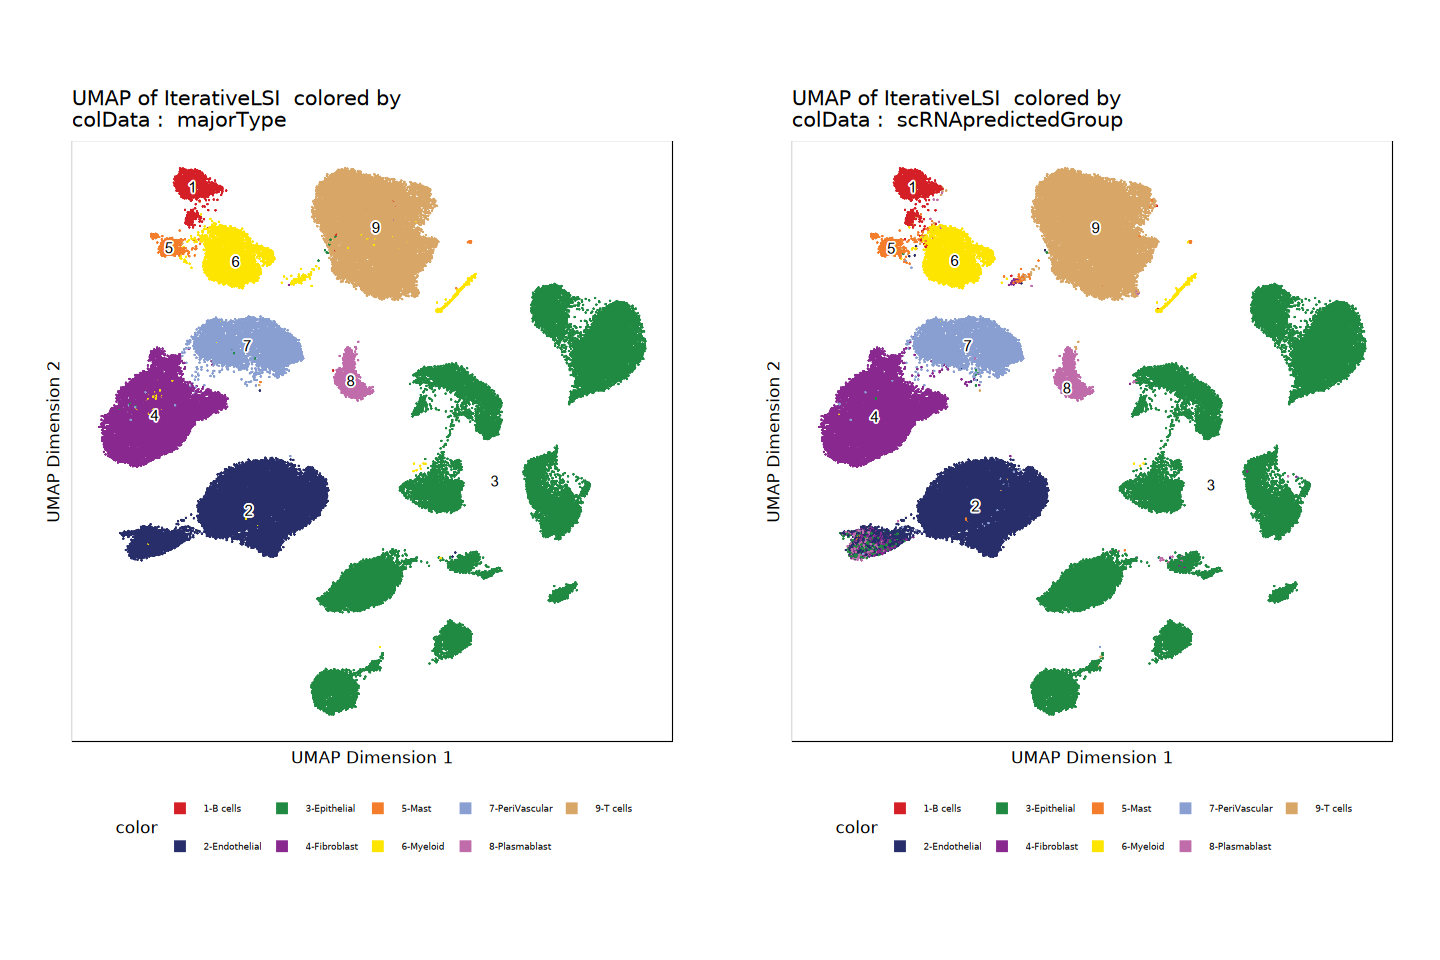

In [4]:
options(repr.plot.height = 8, repr.plot.width = 12)
p1 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "majorType", 
    embedding = "UMAP"
    )
p2 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "scRNApredictedGroup", 
    embedding = "UMAP"
    )
ggAlignPlots(p1, p2, type = "h")

In [4]:
neoadjuvant_annotations <- list(
    "Post-NAT" = c("11T", "12T", "13T", "19T"),
    "Non-NAT" = c("10T", "18T", "20T", "21T", "22T"),
    "Non-Tumor" = c("10N", "12N")
)
idz <- lapply(neoadjuvant_annotations, function(x) which(proj$Sample %in% x))
# 创建proj$type列，长度为proj@cellColData的行数，初始化为NA
proj$neoadjuvant <- rep(NA, nrow(proj@cellColData))
# 遍历idz中的每一个元素，将combinedproj$type中对应的索引赋值为元素的名称
for(i in names(idz)){proj$neoadjuvant[idz[[i]]] <- i}

In [5]:
# 1) 映射表
sample_map <- c(
  "10T" = "BCYZ200T",
  "18T" = "BCYL370T",
  "20T" = "BCYW100T",
  "21T" = "BCYY120T",
  "22T" = "BCYG430T",
  "11T" = "BCYL032T",
  "12T" = "BCYK372T",
  "13T" = "BCYC822T",
  "19T" = "BCYY602T",
  "10N" = "BCYZ200N",
  "12N" = "BCYK372N"
)

# 2) 基于原 Sample 生成新向量
old <- proj$Sample                  # 读取没问题，禁止的是覆盖
new <- unname(sample_map[old])      # 根据映射得到新名称（字符向量）
# 可选：检查是否有没映射到的值
if (any(is.na(new))) {
  message("这些样本未在映射表中：",
          paste(unique(old[is.na(new)]), collapse = ", "))
}

# 3) 新增列 Sample2（推荐方式）
# （给 data 命名为 cell 名，最稳妥）
names(new) <- getCellNames(proj)    # 或者 cellNames(proj)
proj <- addCellColData(
  ArchRProj = proj,
  data      = new,
  name      = "Sample2",
  cells     = names(new),
  force     = TRUE
)

# 4) 快速查看
table(proj$Sample2)
head(getCellColData(proj, select = c("Sample", "Sample2")))




BCYC822T BCYG430T BCYK372N BCYK372T BCYL032T BCYL370T BCYW100T BCYY120T 
    9695     5484     7346     7089     8644     6068     7036     7774 
BCYY602T BCYZ200N BCYZ200T 
    6367    10296    10218 

DataFrame with 6 rows and 2 columns
                            Sample     Sample2
                       <character> <character>
11T#CGCACAGTCGATGTAC-1         11T    BCYL032T
11T#ACCGGGTCACATTCTT-1         11T    BCYL032T
11T#CCTATTAAGCGATACG-1         11T    BCYL032T
11T#GTAGTACTCCATACCC-1         11T    BCYL032T
11T#AGCTATGCAGGTGGTA-1         11T    BCYL032T
11T#TCAGGTAAGGCAAGGG-1         11T    BCYL032T

In [20]:
rasterize_points = TRUE
legend_text_size  = 14
legend_title_size = 16
base_point_shape  = 15
base_point_size   = 5


p1 <- plotEmbedding(
    ArchRProj = proj,
    colorBy   = "cellColData",
    name      = "Sample2",
    embedding = "UMAP",
    rastr     = rasterize_points,  # 使用栅格化
    rasterDPI = if(rasterize_points) 150 else 300  # 栅格化时降低DPI
  )

  p2 <- plotEmbedding(
    ArchRProj = proj,
    colorBy   = "cellColData",
    name      = "neoadjuvant",
    embedding = "UMAP",
    rastr     = rasterize_points,
    rasterDPI = if(rasterize_points) 150 else 300
  )

  # ====== Legend layout (position + one-column) ======
  p1 <- p1 +
    guides(colour = guide_legend(ncol = 1), fill = guide_legend(ncol = 1)) +
    theme(legend.position = "right")

  p2 <- p2 +
    guides(colour = guide_legend(ncol = 1), fill = guide_legend(ncol = 1)) +
    theme(legend.position = "right")

  # ====== Legend style ======
  legend_theme <- theme(
    legend.position   = "right",
    legend.key.size   = unit(0.2, "cm"),
    legend.spacing.y  = unit(0.1, "cm"),
    legend.text       = element_text(size = legend_text_size),
    legend.title      = element_text(size = legend_title_size)
  )

  p1 <- p1 +
    guides(
      colour = guide_legend(
        ncol = 1,
        override.aes = list(shape = base_point_shape, size = base_point_size)
      ),
      fill = guide_legend(
        ncol = 1,
        override.aes = list(shape = base_point_shape, size = base_point_size)
      )
    ) +
    legend_theme

  p2 <- p2 +
    guides(
      colour = guide_legend(
        ncol = 1,
        override.aes = list(shape = base_point_shape, size = base_point_size)
      ),
      fill = guide_legend(
        ncol = 1,
        override.aes = list(shape = base_point_shape, size = base_point_size)
      )
    ) +
    legend_theme

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1a633e1d563ae1-Date-2025-09-07_Time-05-15-56.129513.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding



ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1a633e1d563ae1-Date-2025-09-07_Time-05-15-56.129513.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1a633e6a37d7d9-Date-2025-09-07_Time-05-15-56.642009.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1a633e6a37d7d9-Date-2025-09-07_Time-05-15-56.642009.log



In [21]:
plotPDF(p1,p2, name = "ATAC_UMAP.pdf", ArchRProj = proj, addDOC = FALSE, width = 4, height = 4)

Plotting Ggplot!

Plotting Ggplot!



In [ ]:
PlotUMAPWithArial <- function(
  proj,
  out_dir  = "/home/hanxue/lab/scRNA/neoadjuvant/output_figures",
  width    = 10,
  height   = 6,
  legend_text_size  = 14,
  legend_title_size = 16,
  base_point_shape  = 15,
  base_point_size   = 5,
  font_family       = "Arial",
  rasterize_points  = TRUE,  # 新增：是否栅格化点
  downsample        = NULL,  # 新增：可选的下采样比例(0-1)
  compress_svg      = FALSE   # 新增：是否压缩SVG
){
  # ====== Packages ======
  suppressPackageStartupMessages({
    library(ArchR)
    library(ggplot2)
    library(grid)         # for unit()
    library(systemfonts)  # check installed fonts
 
  })

  # ====== Font resolve (prefer Arial, fallback if missing) ======
  available_families <- unique(systemfonts::system_fonts()$family)
  if (!font_family %in% available_families) {
    fallback <- c("Liberation Sans", "Helvetica", "DejaVu Sans")
    fb <- fallback[fallback %in% available_families][1]
    if (is.na(fb)) fb <- "sans"
    message(sprintf(
      "Font '%s' not found. Falling back to '%s'.",
      font_family, fb
    ))
    font_family <- fb
  }

  # ====== Global plotting options (Jupyter/RStudio) ======
  options(repr.plot.height = 8, repr.plot.width = 12)

  # ====== 新增：下采样以减少点数量 ======
  if(!is.null(downsample) && downsample > 0 && downsample < 1) {
    set.seed(123)  # 确保结果可复现
    proj <- proj[sample(1:nrow(proj), size = nrow(proj)*downsample), ]
    message(sprintf("Downsampled to %.0f%% of original cells", downsample*100))
  }

  # ====== Generate embeddings ======
  

  # ====== Side-by-side view in the console ======
  aligned <- ggAlignPlots(p1, p2, type = "h")
  print(aligned)

  # ====== Save individual figures (SVG) ======
  if (!dir.exists(out_dir)) dir.create(out_dir, recursive = TRUE, showWarnings = FALSE)
  
  # 保存路径
  file1 <- file.path(out_dir, "UMAP_Sample.svg")
  file2 <- file.path(out_dir, "UMAP_Treat.svg")

  ggsave(
    filename = file1,
    plot     = p1,
    device   = "svg",
    width    = width,
    height   = height,
    dpi      = if(rasterize_points) 150 else 300
  )

  ggsave(
    filename = file2,
    plot     = p2,
    device   = "svg",
    width    = width,
    height   = height,
    dpi      = if(rasterize_points) 150 else 300
  )
  plotPDF(p1,p2, name = "/home/hanxue/lab/scRNA/neoadjuvant/output_figures/ATAC_UMAP.pdf", ArchRProj = proj, addDOC = FALSE, width = 4, height = 4)
  
  # ====== 新增：压缩SVG文件 ======
  if(compress_svg && requireNamespace("svgo", quietly = TRUE)) {
    svgo::svgo(file1, overwrite = TRUE)
    svgo::svgo(file2, overwrite = TRUE)
    message("SVG files compressed with svgo")
  }

  invisible(list(p1 = p1, p2 = p2, aligned = aligned, font_used = font_family))
}

# 使用示例：
res <- PlotUMAPWithArial(proj, rasterize_points = TRUE, downsample = 0.7)

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'i' in selecting a method for function '[': argument of length 0


In [4]:
markerGenes  <- c(
    "EPCAM", # 上皮
    "CPA3", # 肥大细胞
    "KDR", # 内皮
    "ITGAX", # 髓系
    "PAX5", # B
    "PDGFRB", # PVL
    "CD38", # 浆细胞
    "CD3D", # T
    "THY1" # 成纤维
  )

p <- plotBrowserTrack(
    ArchRProj = proj, 
    groupBy = "majorType", 
    geneSymbol = markerGenes, 
    upstream = 50000,
    downstream = 50000
)

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-32f7b120a4bb0d-Date-2025-08-25_Time-05-48-09.557138.log
If there is an issue, please report to github with logFile!



2025-08-25 05:48:09.921138 : Validating Region, 0.006 mins elapsed.



GRanges object with 9 ranges and 2 metadata columns:
      seqnames              ranges strand |     gene_id      symbol
         <Rle>           <IRanges>  <Rle> | <character> <character>
  [1]     chr2   47345158-47387601      + |        4072       EPCAM
  [2]     chr3 148865256-148897196      + |        1359        CPA3
  [3]     chr4   55078477-55125589      - |        3791         KDR
  [4]    chr16   31355134-31382997      + |        3687       ITGAX
  [5]     chr9   36833275-37034185      - |        5079        PAX5
  [6]     chr5 150113837-150155872      - |        5159      PDGFRB
  [7]     chr4   15778275-15853230      + |         952        CD38
  [8]    chr11 118338954-118342744      - |         915        CD3D
  [9]    chr11 119417378-119424985      - |        7070        THY1
  -------
  seqinfo: 24 sequences from hg38 genome


2025-08-25 05:48:10.02496 : Adding Bulk Tracks (1 of 9), 0.008 mins elapsed.

2025-08-25 05:48:17.944039 : Adding Feature Tracks (1 of 9), 0.14 mins elapsed.

2025-08-25 05:48:18.046721 : Adding Gene Tracks (1 of 9), 0.142 mins elapsed.

2025-08-25 05:48:18.429306 : Plotting, 0.148 mins elapsed.

2025-08-25 05:48:20.652982 : Adding Bulk Tracks (2 of 9), 0.185 mins elapsed.

2025-08-25 05:48:27.589327 : Adding Feature Tracks (2 of 9), 0.301 mins elapsed.

2025-08-25 05:48:27.666157 : Adding Gene Tracks (2 of 9), 0.302 mins elapsed.

2025-08-25 05:48:28.028092 : Plotting, 0.308 mins elapsed.

2025-08-25 05:48:29.148068 : Adding Bulk Tracks (3 of 9), 0.327 mins elapsed.

2025-08-25 05:48:35.431539 : Adding Feature Tracks (3 of 9), 0.431 mins elapsed.

2025-08-25 05:48:35.49665 : Adding Gene Tracks (3 of 9), 0.432 mins elapsed.

2025-08-25 05:48:35.75611 : Plotting, 0.437 mins elapsed.

2025-08-25 05:48:36.629503 : Adding Bulk Tracks (4 of 9), 0.451 mins elapsed.

2025-08-25 05:48:41.76187

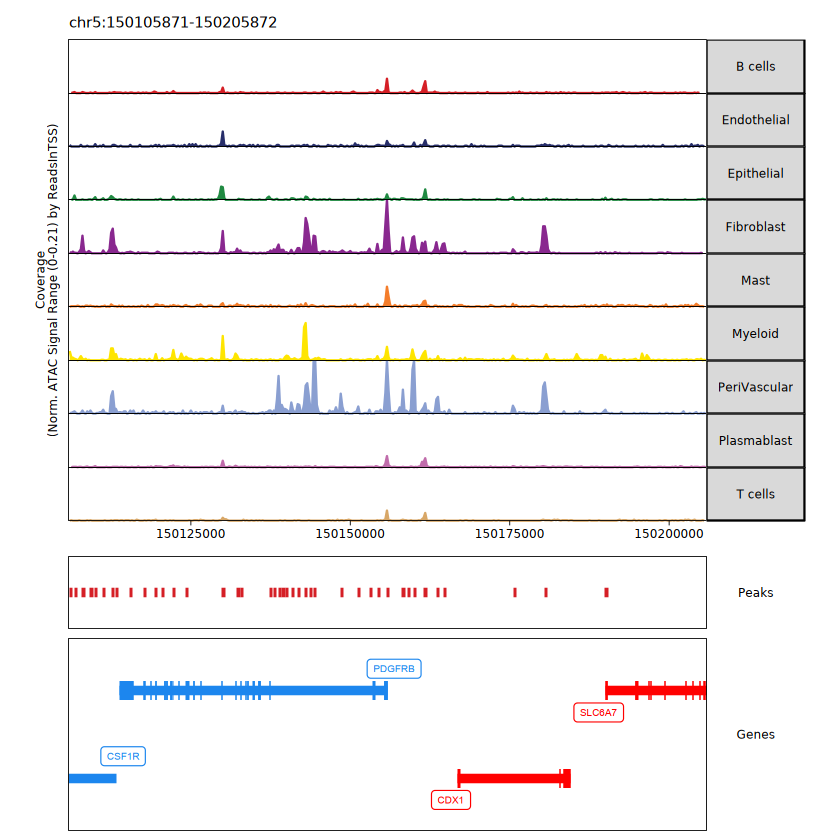

In [5]:
grid::grid.newpage()
grid::grid.draw(p$PDGFRB)

In [6]:
plotPDF(plotList = p, 
    name = "Plot-Tracks-Marker-Genes", 
    ArchRProj = proj, 
    addDOC = FALSE, width = 5, height = 5)

Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


In [24]:
## 保存结果
saveArchRProject(proj, load = FALSE)

Saving ArchRProject...



In [25]:
sessionInfo()

R version 4.4.1 (2024-06-14)
Platform: x86_64-conda-linux-gnu
Running under: Ubuntu 22.04.2 LTS

Matrix products: default
BLAS/LAPACK: /home/hanxue/miniconda3/envs/scseq/lib/libopenblasp-r0.3.21.so;  LAPACK version 3.9.0

Random number generation:
 RNG:     L'Ecuyer-CMRG 
 Normal:  Inversion 
 Sample:  Rejection 
 
locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
 [1] parallel  stats4    grid      stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] Signac_1.14.0               Seurat_5.2.1               
 [3] SeuratObject_5.0.2          sp_2.2-0                   
 [5] rhdf5_2.48.0                SummarizedExp